In [1]:
import string 
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [11]:
from tensorflow import keras

In [12]:
df = pd.read_csv(r'C:\Users\user\Downloads\archive(12)\sign_mnist_test.csv') 
df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [13]:
 def load_data(path): 
    df = pd.read_csv(path) 
    y = np.array([label if label < 9
                  else label-1 for label in df['label']]) 
    df = df.drop('label', axis=1) 
    x = np.array([df.iloc[i].to_numpy().reshape((28, 28)) 
                  for i in range(len(df))]).astype(float) 
    x = np.expand_dims(x, axis=3) 
    y = pd.get_dummies(y).values 
  
    return x, y 
  
X_train, Y_train = load_data(r'C:\Users\user\Downloads\archive(12)\sign_mnist_train.csv') 
X_test, Y_test = load_data(r'C:\Users\user\Downloads\archive(12)\sign_mnist_test.csv') 


In [14]:
print(X_train.shape, Y_train.shape) 
print(X_test.shape, Y_test.shape)


(27455, 28, 28, 1) (27455, 24)
(7172, 28, 28, 1) (7172, 24)


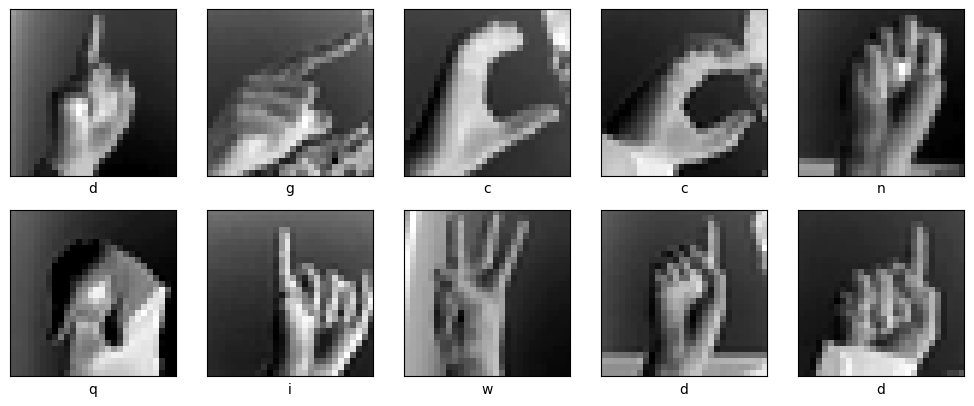

In [15]:
class_names = list(string.ascii_lowercase[:26].replace( 
    'j', '').replace('z', '')) 
  
plt.figure(figsize=(10, 10)) 
for i in range(10): 
    plt.subplot(5, 5, i+1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False) 
    plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary) 
    plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]]) 
plt.tight_layout() 
plt.show() 

In [16]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=(3, 3), 
                           activation='relu', 
                           input_shape=(28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2, 2), 
  
    tf.keras.layers.Conv2D(filters=64, 
                           kernel_size=(3, 3), 
                           activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2), 
  
    tf.keras.layers.Flatten(), 
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dense(24, activation='softmax') 
])

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1600)           │         6,400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │         6,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 442,264 (1.69 MB)

 Trainable params: 438,552 (1.67 MB)

 Non-trainable params: 3,712 (14.50 KB)

In [18]:
model.compile( 
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'] 
) 


In [ ]:
history = model.fit(train_generator, 
                    validation_data=val_generator, 
                    epochs=5, 
                    verbose=1)

In [ ]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:,['loss','val_loss']].plot() 
history_df.loc[:,['accuracy','val_accuracy']].plot() 
plt.show()


In [ ]:
model.evaluate(val_generator)



Conclusion:
By using just a simple CNN model we are able to achieve an accuracy of 82% which is really great. This shows that this technology is certainly going to help us build some amazing applications which can be proved a really great tool for people with some special needs.